# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm

import warnings
plt.rcParams['figure.figsize']=[10,8]
sns.set(style='white')
sns.set_palette('Set2')

warnings.filterwarnings('ignore')

In [2]:
# matplotlib 한글 설정
import platform
from matplotlib import font_manager, rc 

path = "C:/Windows/Fonts/NanumSquare.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system. sorry")

### 2) 데이터 로딩

In [3]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 대학졸업여부와 이탈여부는 관계가 있다.(범주형)

* 가설2 : 만족도 설문과 이탈여부는 관계가 있다.(범주형)

* 가설3 : 변경 계획 설문과 이탈여부는 관계가 있다.(범주형)

* 가설4 : 월 초과사용 시간과 이탈여부는 관계가 있다.(숫자형)

* 가설5 : 연 수입액과 이탈여부는 관계가 있다.(숫자형)

* 가설6 : 월 사용 잔여시간과 이탈여부는 관계가 있다.(숫자형)

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

# 범주형 변수

### 1) feature1

### 변수 : COLLEGE
> - 대학 졸업 여부
> - 범주형 변수

In [4]:
var = 'COLLEGE'

- NaN 존재 유무

In [5]:
mobile[var].isna().sum()

0

> - 존재 유무 : 존재 안함

- 가변수화 필요 여부

> - 필요 없음

- 기초통계량(수치화)

In [6]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

1    9049
0    8951
Name: COLLEGE, dtype: int64
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64


- 분포 확인(시각화)

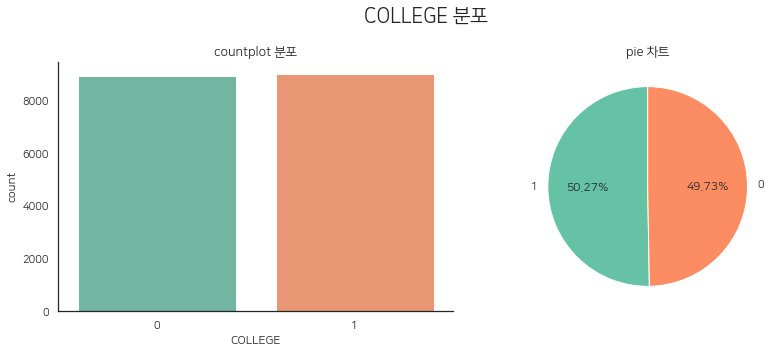

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(mobile[var])
sns.despine()
plt.title("countplot 분포", size = 13)

plt.subplot(1,2,2)
plt.pie(mobile[var].value_counts(), labels = mobile[var].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.title("pie 차트", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - 전체 18000명 중, 대학 졸업자가 9049명이고 대학 미졸업자가 8951명
> - 약 50%로 서로 비슷한 비율로 분포하고 있다.

### 추가 분석 사항
> - 대학 졸업자이면, 이제 사회에 진출하면서 직접 돈을 벌기 시작할 것이다. 그러면서 이전보다 자유로워지면서 기존에 가족 구성원에 묶여 있던 상황에서 풀리게 될 것이고, 본인이 원했던 통신사로 이전할 가능성이 높아지면서 이탈률이 높아질 것이다.
> - 반대로 대학 미졸업자이면, 아직 가족의 영향을 많이 받으므로, 가족 결합 등 묶여 있는 것이 많아서 자유롭게 통신사를 이동할 수 없을 것이므로 이탈률이 낮을 것이다.
> - 결론적으로 대학 졸업과 미졸업으로 구분하여 이탈률을 파악해볼 필요가 있다.
> - 추가적으로 대학 졸업자 중 미취업자도 있을 것이기 때문에 연 수입액 변수와 함께 비교하여 이탈률과 관련이 있는지 판단할 필요가 있다.

### 2) feature2

### 변수 : REPORTED_SATISFACTION
> - 만족도 설문 ('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )
> - 범주형 변수

In [8]:
var = 'REPORTED_SATISFACTION'

- NaN 존재 유무

In [9]:
mobile[var].isna().sum()

38

> - 존재 유무 : 존재함

In [10]:
# 결측치 제거
mobile = mobile.loc[mobile[var].notnull()]

In [11]:
mobile[var].isna().sum()

0

- 가변수화 필요 여부

In [12]:
mobile[var].unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', 'avg'], dtype=object)

> - 필요함
    - 매우만족 : 5 
    - 만족 : 4
    - 평균 : 3 
    - 불만족 : 2 
    - 매우불만족 : 1

- 기초통계량(수치화)

In [13]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64


- 분포 확인(시각화)

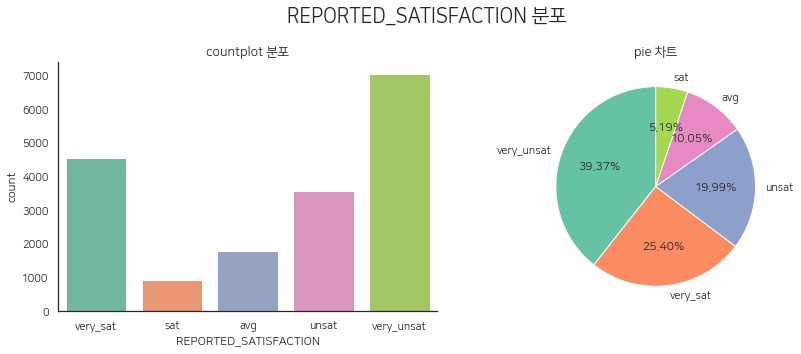

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(mobile[var], order =["very_sat","sat","avg","unsat","very_unsat"])
sns.despine()
plt.title("countplot 분포", size = 13)

plt.subplot(1,2,2)
plt.pie(mobile[var].value_counts(), labels = mobile[var].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.title("pie 차트", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - 매우불만족 > 매우만족 > 불만족 > 평균 > 만족 순으로 비율이 높다.

### 추가 분석 사항
> - 매우불만족이 약 40%나 되는 것으로 보아, 많은 고객들이 매우 만족을 하지 못하는 상황인 것으로 파악할 수 있다.
> - 이탈률이 약 50%였는데 아마 매우불만족을 준 약 40%의 고객들이 이탈했을 가능성이 있을 것 같아보인다.
> - 따라서 만족도 설문과 이탈 여부를 분석해볼 필요가 있을 것 같다.

### 3) feature3

### 변수 : CONSIDERING_CHANGE_OF_PLAN
> - 변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')
> - 범주형 변수

In [15]:
var = 'CONSIDERING_CHANGE_OF_PLAN'

- NaN 존재 유무

In [16]:
mobile[var].isna().sum()

0

> - 존재 유무 : 존재 안함

- 가변수화 필요 여부

In [17]:
mobile[var].unique()

array(['considering', 'no', 'never_thought', 'actively_looking_into_it',
       'perhaps'], dtype=object)

> - 필요함
    - 'actively_looking_into_it' : 무조건 변경할 것이다. 5
    - 'considering' : 변경할 것이다. 4
    - 'perhaps' : 아마 변경할 것이다. 3
    - 'no' : 변경하지 않을 것이다. 2
    - 'never_thought' : 절대 변경하지 않을 것이다. 1

- 기초통계량(수치화)

In [18]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

considering                 7122
actively_looking_into_it    4446
no                          3639
never_thought               1800
perhaps                      955
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
considering                 0.396504
actively_looking_into_it    0.247523
no                          0.202594
never_thought               0.100212
perhaps                     0.053168
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64


- 분포 확인(시각화)

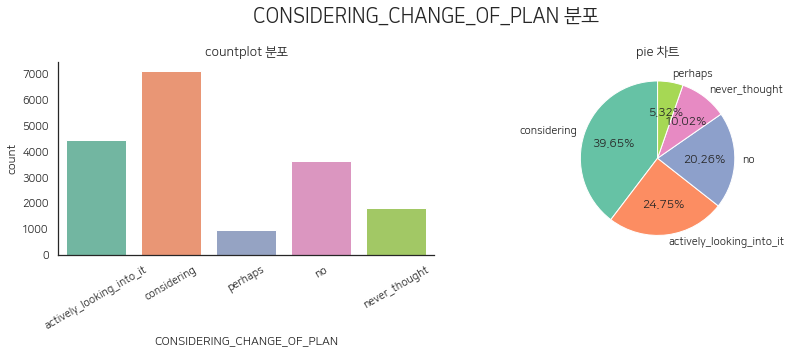

In [19]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.xticks(rotation=30)
sns.countplot(mobile[var], 
              order =["actively_looking_into_it","considering","perhaps","no","never_thought"])
sns.despine()
plt.title("countplot 분포", size = 13)

plt.subplot(1,2,2)
plt.pie(mobile[var].value_counts(), labels = mobile[var].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.title("pie 차트", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - considering > actively_looking_into_it > no > never_thought > perhaps 순으로 비율이 높다.

### 추가 분석 사항
> - 이탈률이 약 50%였는데, considering(변경할 것이다)라고 응답한 비율이 약 40%로 높기 때문에,  considering(변경할 것이다)라고 응답한 고객들이 이탈했을 가능성이 있을 것 같아보인다.
> - 따라서 변경 계획 설문과 이탈 여부를 분석해볼 필요가 있을 것 같다.
> - 추가적으로 변경 계획 설문과 만족도 조사가 비슷한지 분석해볼 필요도 있을 것 같다.

# 숫자형 변수

### 4) feature4

### 변수 : OVERAGE
> - 월 초과사용 시간(분)
> - 숫자형 변수

In [20]:
var = 'OVERAGE'

- NaN 존재 유무

In [21]:
mobile[var].isna().sum()

0

> - 존재 유무 : 존재 안함

- 기초통계량(수치화)

In [22]:
mobile[var].describe()

count    17962.000000
mean        86.019263
std         85.966366
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

- 분포 확인(시각화)

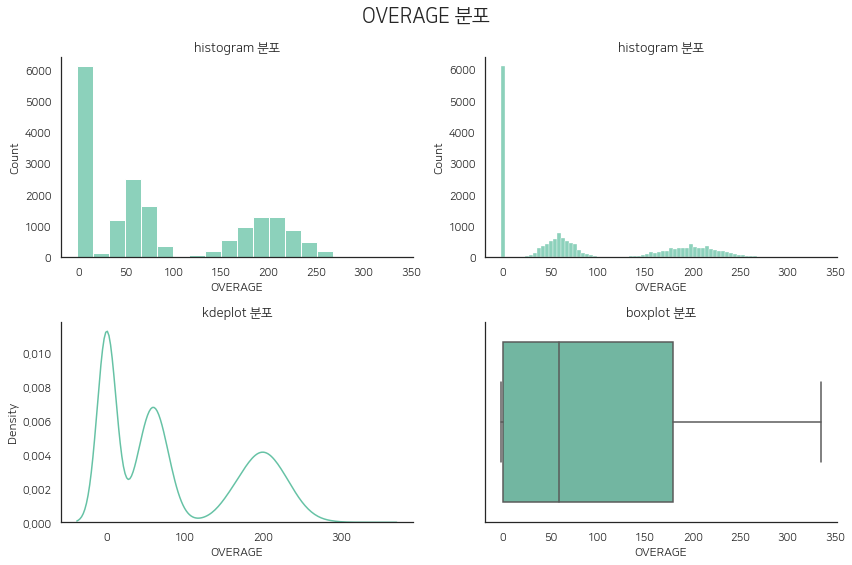

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 20
sns.histplot(mobile[var], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
bins = 80
sns.histplot(mobile[var], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(mobile[var])
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
sns.boxplot(mobile[var])
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - 약 25%가 0인 것을 보아 고객의 25%는 월 사용시간을 초과하지 않는 편인 것을 알 수 있다. 
> - 분포를 보면 0, 1 ~ 100, 100 ~ 300 구간으로 특징이 가지고 있는 것으로 보인다.

### 추가 분석 사항
> - 월 초과 사용 시간이 많은 고객은 월 사용 요금이 높아지면서 이탈하려고 할 가능성이 있을 것 같으므로, 월 초과사용 시간과 이탈 여부를 분석해볼 필요가 있다.
> - 0, 1 ~ 100, 100 ~ 300이상으로 구간을 나눠서 이탈여부를 분석해볼 필요가 있을 것 같다.

### 5) feature5

### 변수 : INCOME
> - 연 수입액
> - 숫자형 변수

In [24]:
var = 'INCOME'

- NaN 존재 유무

In [25]:
mobile[var].isna().sum()

0

> - 존재 유무 : 존재 안함

- 기초통계량(수치화)

In [26]:
mobile[var].describe()

count     17962.000000
mean      80318.592195
std       41698.185540
min       20007.000000
25%       42172.000000
50%       75510.500000
75%      116082.750000
max      159983.000000
Name: INCOME, dtype: float64

- 분포 확인(시각화)

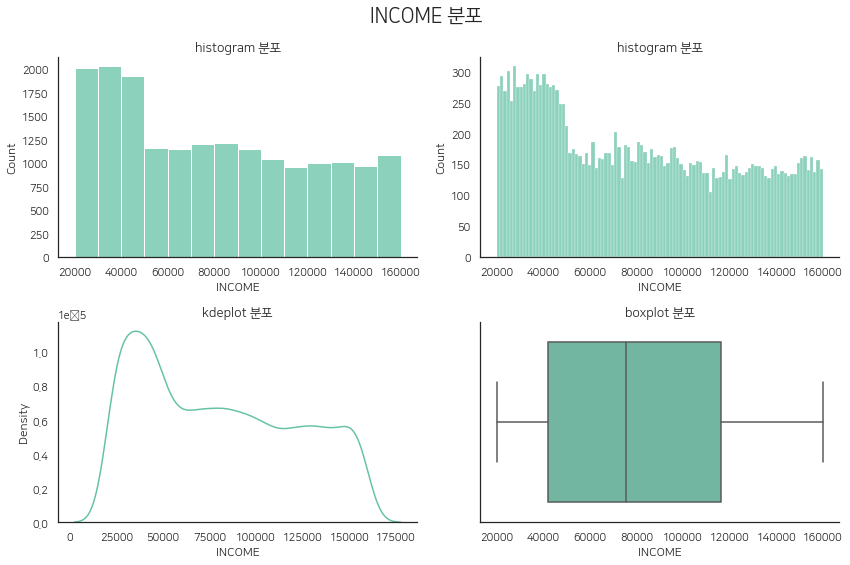

In [27]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 14
sns.histplot(mobile[var], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
bins = 100
sns.histplot(mobile[var], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(mobile[var])
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
sns.boxplot(mobile[var])
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - 약간 왼쪽으로 치우친 형태의 그래프로 판단된다. 
> - 특히 20000 ~ 50000 달러 수입을 가진 고객이 많이 분포되어 있다.

### 추가 분석 사항
> - 50000달러 전 후로 구간을 나눠서 이탈여부를 분석해볼 필요가 있을 것 같다.

### 6) feature6

### 변수 : LEFTOVER
> - 월 사용 잔여시간(%)
> - 숫자형 변수

In [28]:
var = 'LEFTOVER'

- NaN 존재 유무

In [29]:
mobile[var].isna().sum()

0

> - 존재 유무 : 존재 안함

- 기초통계량(수치화)

In [30]:
mobile[var].describe()

count    17962.000000
mean        23.980626
std         26.853695
min          0.000000
25%          0.000000
50%         14.000000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

- 분포 확인(시각화)

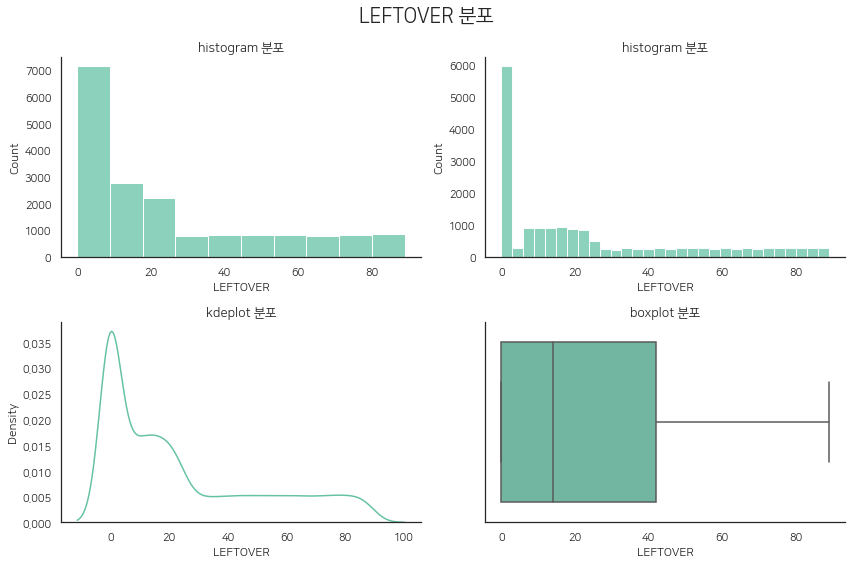

In [31]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 10
sns.histplot(mobile[var], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
bins = 30
sns.histplot(mobile[var], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(mobile[var])
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
sns.boxplot(mobile[var])
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - 약간 왼쪽으로 치우친 형태의 그래프로 판단된다. 
> - 월 사용 잔여시간(분)이 0인 고객이 25%가 차지한다.

### 추가 분석 사항
> - 월 사용 잔여시간이 많으면 추가 요금이 발생하지 않기 때문에 만족하는 고객이 많을 것이라고 생각된다.
> - 따라서 월 사용 잔여시간과 이탈 여부를 분석해볼 필요가 있다.
> - 0, 1~30, 30이상으로 구간을 나눠서 이탈여부를 분석해볼 필요가 있을 것 같다.

### 7) CHURN(target)

> - 이탈여부
> - 범주형 변수

In [32]:
var = 'CHURN'

- NaN 존재 유무

In [33]:
mobile[var].isna().sum()

0

> - 존재 유무 : 존재 안함

- 가변수화 필요 여부

> - 필요 없음

- 기초통계량(수치화)

In [34]:
print(mobile[var].value_counts())
print(mobile[var].value_counts()/ len(mobile[var]))

0    9113
1    8849
Name: CHURN, dtype: int64
0    0.507349
1    0.492651
Name: CHURN, dtype: float64


- 분포 확인(시각화)

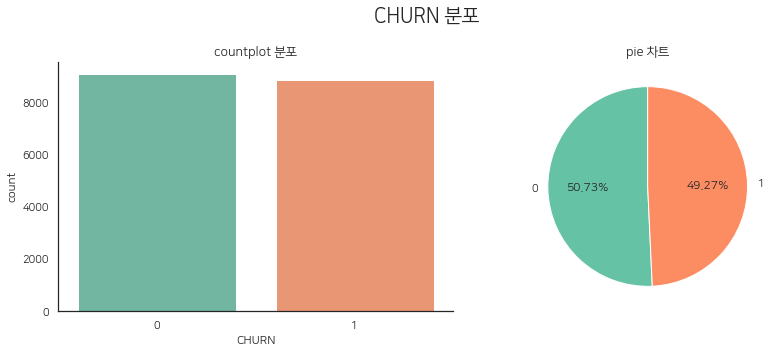

In [35]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(mobile[var])
sns.despine()
plt.title("countplot 분포", size = 13)

plt.subplot(1,2,2)
plt.pie(mobile[var].value_counts(), labels = mobile[var].value_counts().index, 
        autopct="%.2f%%", startangle = 90)
plt.title("pie 차트", size = 13)

title = f"{var} 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

### 파악한 정보
> - 전체 18000명 중, 이탈자가 8869명이고 유지자가 9131명
> - 약 50%가 이탈하는 것으로 판단할 수 있다.

### 추가 분석 사항
> - 이탈률이 약 50%이면 상당히 많은 고객이 이탈하는 것인데 어떠한 변수가 이탈에 영향을 미치는 요인인지 분석해야 한다.

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [36]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN

In [37]:
feature = 'COLLEGE'

In [38]:
mobile[feature].isna().sum()

0

① 교차표(pd.crosstab())

In [39]:
cross = pd.crosstab(mobile[feature], mobile[target], normalize='index')
cross

CHURN,0,1
COLLEGE,,
0,0.516118,0.483882
1,0.498671,0.501329


② 시각화( Stacked Bar, Mosaic)

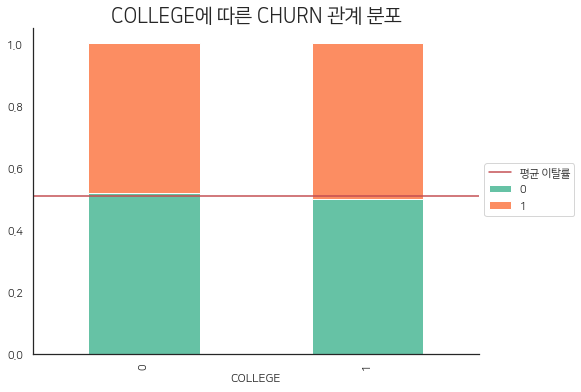

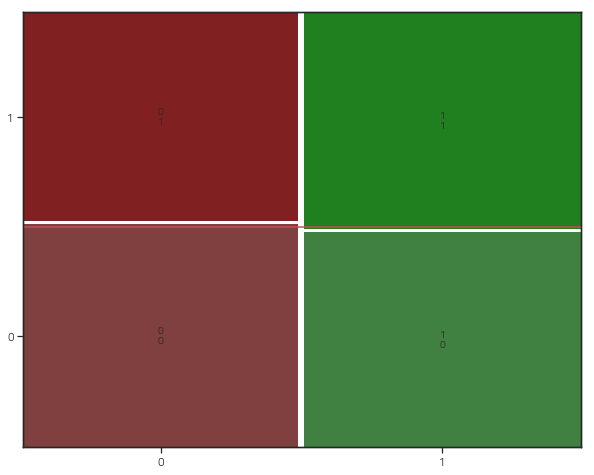

In [40]:
cross.plot.bar(stacked=True, figsize=(8,6))
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.legend(labels= ["평균 이탈률","0","1"],bbox_to_anchor=(1, 0.6))
sns.despine()
plt.title("COLLEGE에 따른 CHURN 관계 분포", size = 20)
plt.show()

mosaic(mobile.sort_values([feature, target]),[feature, target], gap = 0.01)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - Stacked Bar, Mosaic로 시각화해본 결과, 
    - 대학 졸업자와 대학 미졸업자의 평균 이탈률은 차이가 크지않다.

③ 가설검정(카이제곱검정)

In [41]:
# 카이제곱검정
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 5.399292741405256
p-value 0.020144913376353345


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - 평균 이탈률이 거의 차이 나지 않은 것을 보며, 대학 졸업 여부와 이탈 여부는 관련이 많진 않은 것을 유추할 수 있다.

>- 가설검정 결과
    - p-value가 0.05보다 작지만 크게 차이 나지 않아 관련이 작다고 판단할 수 있다.
    
>- 앞서 시각화한 결과와 가설검정 결과를 같이 본 결과, 
  <br></br>귀무가설은 기각하고, 대립가설인 " 대학졸업여부와 이탈여부는 관계가 있다."를 채택할 수 있다.
> - 결론 : 관계가 있다. (약한 관계 유추)
> - **추가 : 대학 졸업자 중 미취업자가 있어서 가족의 영향을 아직 많이 받아 결합이 묶여 있어 자유롭지 못한 것일 수도 있기 때문에, 연 수입액 변수와 함께 비교하여 이탈률과 관련이 있는지 판단할 필요가 있다.**

#### 2) REPORTED_SATISFACTION --> CHURN

In [42]:
feature = 'REPORTED_SATISFACTION'

In [43]:
mobile[feature].isna().sum()

0

① 교차표(pd.crosstab())

In [44]:
cross = pd.crosstab(mobile[feature], mobile[target], normalize='index')
cross

CHURN,0,1
REPORTED_SATISFACTION,,
avg,0.527132,0.472868
sat,0.527897,0.472103
unsat,0.499164,0.500836
very_sat,0.511618,0.488382
very_unsat,0.500990,0.499010


② 시각화( Stacked Bar, Mosaic)

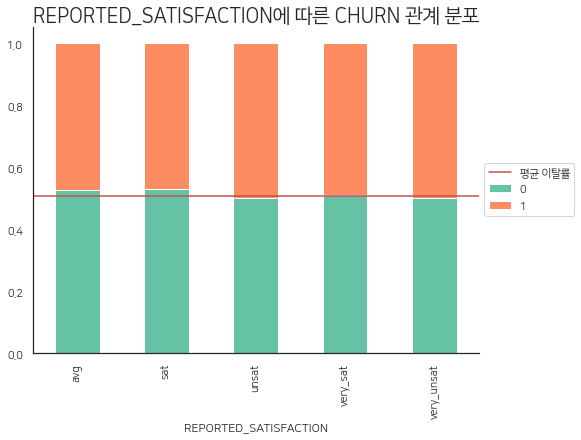

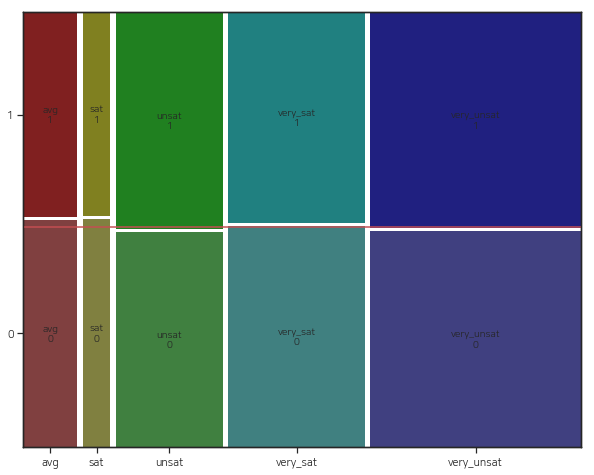

In [45]:
cross.plot.bar(stacked=True, figsize=(8,6))
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.legend(labels= ["평균 이탈률","0","1"],bbox_to_anchor=(1, 0.6))
sns.despine()
plt.title("REPORTED_SATISFACTION에 따른 CHURN 관계 분포", size = 20)
plt.show()

mosaic(mobile.sort_values([feature, target]),[feature, target], gap = 0.01)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - Stacked Bar, Mosaic로 시각화해본 결과, 
    - 만족도조사와 평균 이탈률은 차이가 크지않다.

③ 가설검정(카이제곱검정)

In [46]:
# 카이제곱검정
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - 평균 이탈률이 거의 차이 나지 않은 것을 보며, 만족도 조사와 이탈 여부는 관련이 많진 않은 것을 유추할 수 있다.

>- 가설검정 결과
    - p-value가 0.05보다 크기 때문에 관련이 없다고 볼 수 있다.

>- 앞서 시각화한 결과와 가설검정 결과를 같이 본 결과, 
<br></br>대립가설인 "만족도 조사와 이탈 여부가 관련있다"는 가설은 기각하고 귀무가설을 채택할 수 있다.
>- 결론 : 관계가 없다.
> - **추가 : 대학 미졸업자 중 불만이 있지만 가족 결합 때문에 바꾸지 못하는 고객이 있을 수도 있으므로 대학 졸업여부와 만족도 조사와 이탈여부를 함께 분석해볼 필요가 있다.**

#### 3) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [47]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

In [48]:
mobile[feature].isna().sum()

0

① 교차표(pd.crosstab())

In [49]:
cross = pd.crosstab(mobile[feature], mobile[target], normalize='index')
cross

CHURN,0,1
CONSIDERING_CHANGE_OF_PLAN,,
actively_looking_into_it,0.511471,0.488529
considering,0.510952,0.489048
never_thought,0.513333,0.486667
no,0.500687,0.499313
perhaps,0.475393,0.524607


② 시각화( Stacked Bar, Mosaic)

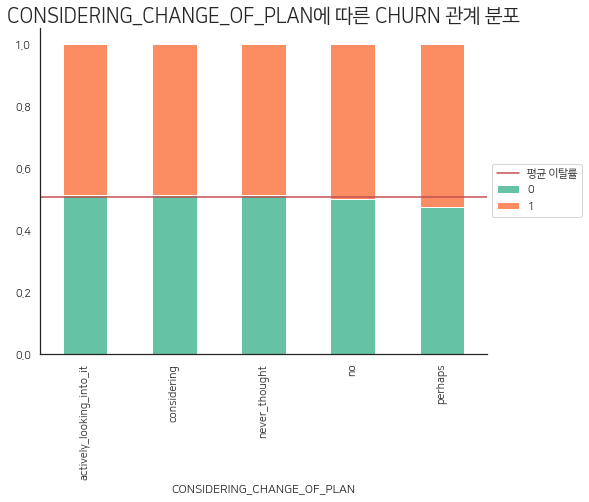

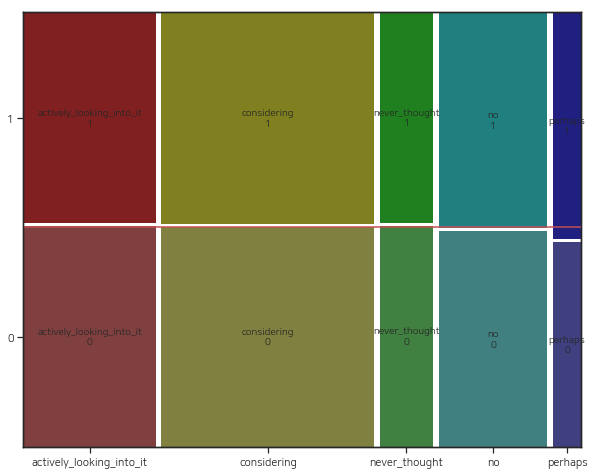

In [50]:
cross.plot.bar(stacked=True, figsize=(8,6))
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.legend(labels= ["평균 이탈률","0","1"],bbox_to_anchor=(1, 0.6))
sns.despine()
plt.title("CONSIDERING_CHANGE_OF_PLAN에 따른 CHURN 관계 분포", size = 20)
plt.show()

mosaic(mobile.sort_values([feature, target]),[feature, target], gap = 0.01)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - Stacked Bar, Mosaic로 시각화해본 결과, 
    - 변경 계획 설문과 평균 이탈률은 차이가 크지않다.

③ 가설검정(카이제곱검정)

In [51]:
# 카이제곱검정
table = pd.crosstab(mobile[target], mobile[feature])
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])

카이제곱통계량 5.47804955291739
p-value 0.2416656900460956


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - 평균 이탈률이 거의 차이 나지 않은 것을 보며, 변경 계획 설문와 이탈 여부는 관련이 많진 않은 것을 유추할 수 있다.

>- 가설검정 결과
    - p-value가 0.05보다 크기 때문에 관련이 없다고 볼 수 있다.

>- 앞서 시각화한 결과와 가설검정 결과를 같이 본 결과, 
<br></br>대립가설인 "변경 계획 설문와 이탈 여부가 관련있다"는 가설은 기각하고 귀무가설을 채택할 수 있다.
>- 결론 : 관계가 없다.
> - **추가 : 대학 미졸업자 중 변경 계획은 있지만 가족 결합 때문에 바꾸지 못하는 고객이 있을 수도 있으므로 대학 졸업여부와 변경 계획 설문과 이탈여부를 함께 분석해볼 필요가 있다.**

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) OVERAGE --> CHURN


In [52]:
feature = 'OVERAGE'

In [53]:
mobile[feature].isna().sum()

0

In [54]:
mobile[feature].describe()

count    17962.000000
mean        86.019263
std         85.966366
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

① 그래프 : histogram, densityplot

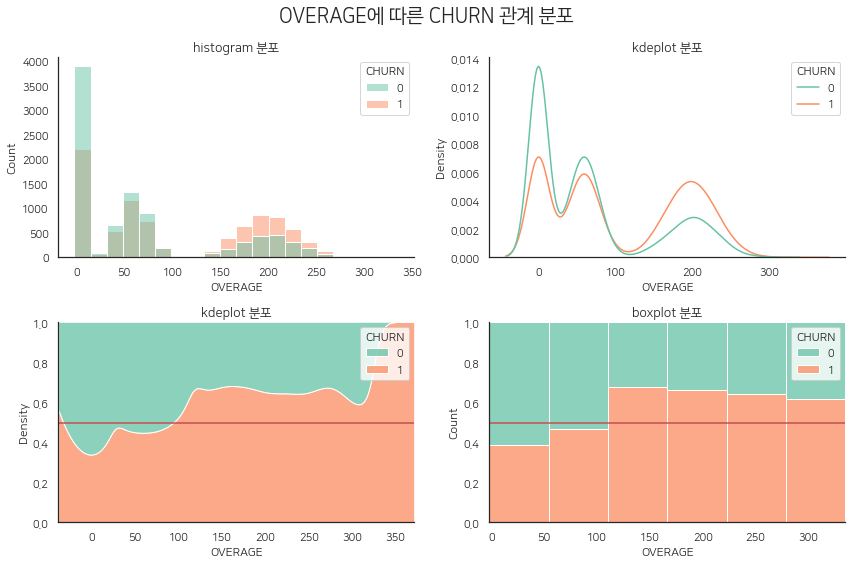

In [55]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 20
sns.histplot(x= mobile[feature], hue = mobile[target], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
sns.kdeplot(x= mobile[feature], hue = mobile[target], common_norm=False)
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(x = mobile[feature], hue = mobile[target], multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
bins = 6
sns.histplot(x = mobile[feature], hue = mobile[target], multiple = 'fill', bins = bins)
plt.axhline(mobile[target].mean(), color = 'r')
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{feature}에 따른 {target} 관계 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 그래프의 분포를 보면
    - 이탈 여부에 따른 밀도함수 그래프가 서로 겹치지 않는 것을 보아 월 초과사용 시간과 이탈 여부가 관계가 있다고 유추할 수 있다.
    - 1 ~ 100분 까지는 유지자 비율이 더 높지만, 100분이상부터는 이탈자 비율이 더 높은 것을 확인할 수 있다.
    - 0분, 즉 월 사용 시간이 초과하지 않은 고객은 유지자 비율이 높은 것을 확인할 수 있다.

② 수치화 : 로지스틱회귀

In [56]:
# 로지스틱회귀
import statsmodels.api as sm  # 로지스틱 회귀 불러오는 패키지

model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680602
         Iterations 4
OVERAGE    1.269139e-96
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - **100분 이상 사용하는 고객의 이탈 비율이 높아지는 것을 보아, 특히 월 초과 사용 시간이 100분 이상으로 증가할 수록 이탈자가 증가한다고 유추할 수 있다.**
    - 또한 0인 월 사용 시간이 초과하지 않는 고객은 유지자가 증가한다고 유추할 수 있다.

> - 로지스틱회귀 결과
    - p-value가 0.05보다 작기 때문에 관련이 있다고 판단할 수 있다.

>- 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과, 
    <br></br>귀무가설을 기각하고, 대립가설인 "월 초과 사용 시간와 이탈 여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다! (강한 관계 유추)

#### 2) INCOME --> CHURN


In [57]:
feature = 'INCOME'

In [58]:
mobile[feature].isna().sum()

0

In [59]:
mobile[feature].describe()

count     17962.000000
mean      80318.592195
std       41698.185540
min       20007.000000
25%       42172.000000
50%       75510.500000
75%      116082.750000
max      159983.000000
Name: INCOME, dtype: float64

① 그래프 : histogram, densityplot

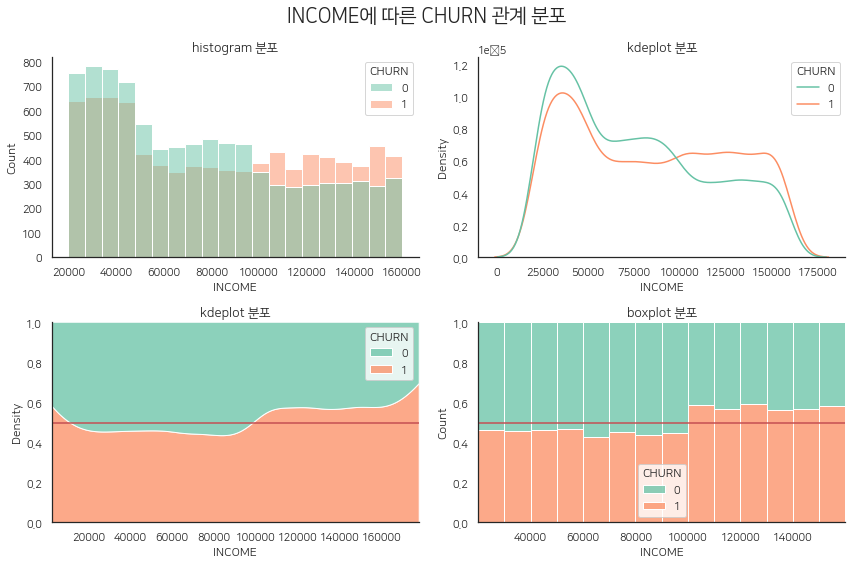

In [60]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 20
sns.histplot(x= mobile[feature], hue = mobile[target], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
sns.kdeplot(x= mobile[feature], hue = mobile[target], common_norm=False)
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(x = mobile[feature], hue = mobile[target], multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
bins = 14
sns.histplot(x = mobile[feature], hue = mobile[target], multiple = 'fill', bins = bins)
plt.axhline(mobile[target].mean(), color = 'r')
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{feature}에 따른 {target} 관계 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 그래프의 분포를 보면
    - 이탈 여부에 따른 밀도함수 그래프가 서로 겹치지 않는 것을 보아 연 수입액과 이탈 여부가 관계가 있다고 유추할 수 있다.
    - 연 수입액이 100000달러 이상부터 이탈자 비율이 높아지는 것을 확인할 수 있다.

② 수치화 : 로지스틱회귀

In [61]:
# 로지스틱회귀
import statsmodels.api as sm  # 로지스틱 회귀 불러오는 패키지

model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692685
         Iterations 2
INCOME    0.000047
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - **연 수입액이 100000달러 이상부터 이탈자 비율이 높아지는 것을 보아, 수입액이 많을수록 이탈률이 증가한다고 유추할 수 있다.**

> - 로지스틱회귀 결과
    - p-value가 0.05보다 작기 때문에 관련이 있다고 판단할 수 있다.

>- 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과, 
    <br></br>귀무가설을 기각하고, 대립가설인 "연 수입액과 이탈 여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다! (약한 관계 유추)

#### 3) LEFTOVER --> CHURN


In [62]:
feature = 'LEFTOVER'

In [63]:
mobile[feature].isna().sum()

0

In [64]:
mobile[feature].describe()

count    17962.000000
mean        23.980626
std         26.853695
min          0.000000
25%          0.000000
50%         14.000000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

① 그래프 : histogram, densityplot

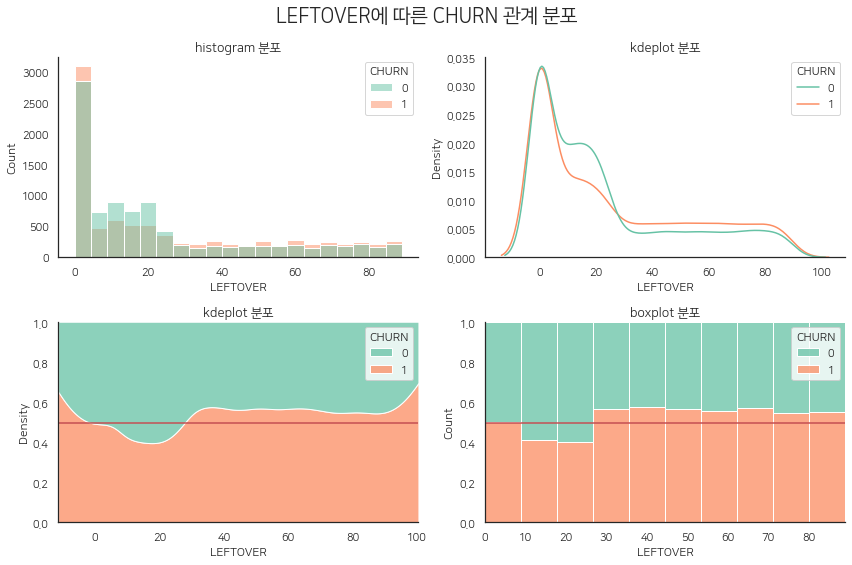

In [65]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
bins = 20
sns.histplot(x= mobile[feature], hue = mobile[target], bins = bins)
sns.despine()
plt.title("histogram 분포", size = 13)

plt.subplot(2,2,2)
sns.kdeplot(x= mobile[feature], hue = mobile[target], common_norm=False)
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,3)
sns.kdeplot(x = mobile[feature], hue = mobile[target], multiple = 'fill')
plt.axhline(mobile[target].mean(), color = 'r')
sns.despine()
plt.title("kdeplot 분포", size = 13)

plt.subplot(2,2,4)
bins = 10
sns.histplot(x = mobile[feature], hue = mobile[target], multiple = 'fill', bins = bins)
plt.axhline(mobile[target].mean(), color = 'r')
sns.despine()
plt.title("boxplot 분포", size = 13)

title = f"{feature}에 따른 {target} 관계 분포"
plt.suptitle(title, size=20)
plt.tight_layout()
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 그래프의 분포를 보면
    - 이탈 여부에 따른 밀도함수 그래프가 많이 겹치지 않는 것을 보아 월 사용 잔여시간과 이탈 여부가 관계가 있다고 유추할 수 있다.
    - 월 사용 잔여시간이 10 ~ 30분에서는 유지율이 더 높지만, 잔여 시간이 30분 이상부터는 이탈률이 조금 더 높은 것을 확인할 수 있다.

② 수치화 : 로지스틱회귀

In [66]:
# 로지스틱회귀
import statsmodels.api as sm  # 로지스틱 회귀 불러오는 패키지

model = sm.Logit(mobile[target], mobile[feature])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692538
         Iterations 3
LEFTOVER    0.000003
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화 결과
    - 월 사용 잔여시간이 10 ~ 30분에서는 유지율이 더 높지만, 잔여 시간이 30분 이상부터는 이탈률이 조금 더 높은 것을 보아, 잔여 시간이 많은 고객은 사용하는 요금제가 너무 불필요하게 높아서 사용 시간이 남는 고객이라고 유추할 수 있다. 그래서 맞지 않은 요금제를 쓰는 것에 불만이 있어서 이탈할 가능성도 있을 것으로 판단된다.

> - 로지스틱회귀 결과
    - p-value가 0.05보다 작기 때문에 관련이 있다고 판단할 수 있다.

>- 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과, 
    <br></br>귀무가설을 기각하고, 대립가설인 "월 사용 잔여시간과 이탈 여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다! (약한 관계 유추)

## 4.관계 정리

### 1) 강한관계의 변수

- OVERAGE

### 2) 약한관계의 변수

- COLLEGE
- INCOME
- LEFTOVER

### 3) 관계 없음

- REPORTED_SATISFACTION
- CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석

### 1) 분석 1 

- OVERAGE를 구간을 나눠서 분석
- 0분 : 초과하지 않은 고객
- 1분 ~  100분 : 1~99분 사용한 고객
- 100분 이상 : 100분 이상 사용한 고객

In [67]:
bins = [0,1,100, np.inf]
labels = ['초과하지 않은 고객', '1~99분 사용한 고객','100분 이상 사용한 고객']
mobile["Overage_Group"] = pd.cut(mobile["OVERAGE"], bins = bins, labels = labels, right = False)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,Overage_Group
0,1,47711,183,17,730589.0,192,5,unsat,considering,0,100분 이상 사용한 고객
1,0,74132,191,43,535092.0,349,2,unsat,no,1,100분 이상 사용한 고객
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,초과하지 않은 고객
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,초과하지 않은 고객
4,1,23392,0,0,216707.0,233,15,unsat,no,1,초과하지 않은 고객


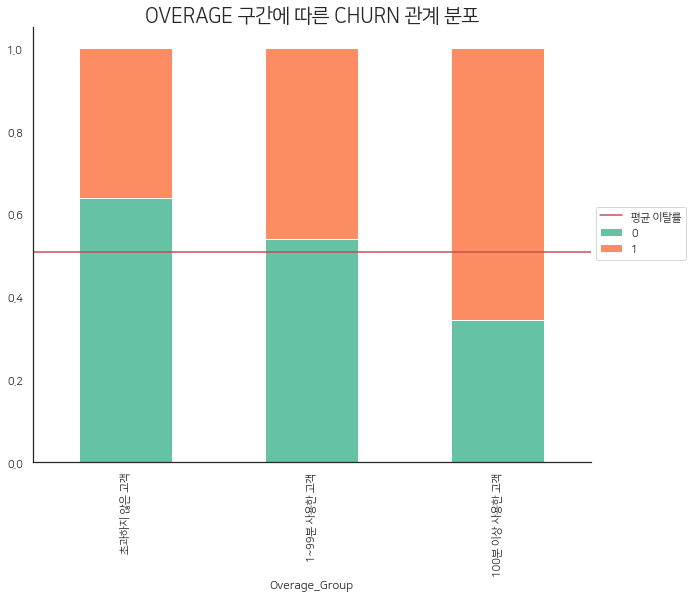

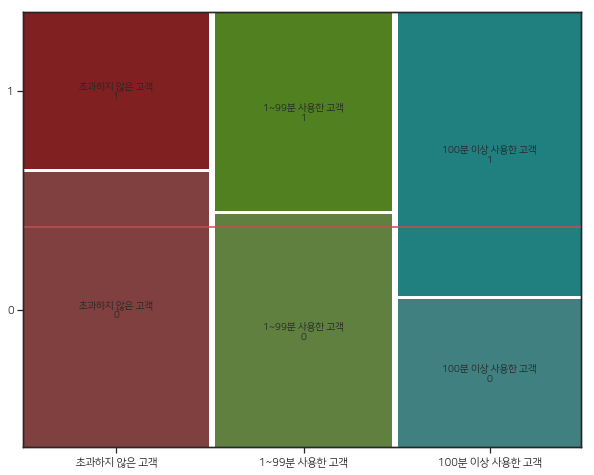

카이제곱통계량 1087.356550335974
p-value 7.647599988342926e-237


In [68]:
temp = pd.crosstab(mobile["Overage_Group"], mobile[target], normalize= 'index')
temp.plot.bar(stacked = True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.legend(labels= ["평균 이탈률","0","1"],bbox_to_anchor=(1, 0.6))
sns.despine()
plt.title("OVERAGE 구간에 따른 CHURN 관계 분포", size = 20)
plt.show()

mosaic(mobile.sort_values(["Overage_Group", target]),["Overage_Group", target], gap = 0.01)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

table = pd.crosstab(mobile[target], mobile["Overage_Group"])
result = spst.chi2_contingency(table)
print("카이제곱통계량", result[0])
print('p-value', result[1])

- 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 시각화한 결과
    - 월 초과 사용 시간과 평균 이탈률과 차이가 꽤 있는 것으로 파악된다.
    
> - 가설검정 결과
    - p-value가 0.05보다 작으므로 관련이 있다고 판단된다.

> - 앞서 시각화한 결과와 로지스틱회귀 결과를 같이 본 결과,
귀무가설을 기각하고, 대립가설인 "월 초과 사용 시간 이탈 여부가 관련있다"는 가설은 채택할 수 있다.
> - 결론 : 관계가 있다. (강한 관계 추정)
    - **월 초과 사용 시간이 100분 이상 초과하는 고객은 요금제는 낮추면서, 사용량은 늘릴 수 있는 요금제 또는 무제한 요금제를 추천 및 권유하도록 광고나 서비스를 제공해야한다고 생각한다.** 